In [34]:
import pandas as pd

## download data from kaggle from this link

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Then unzip in use the file.

note the file is more than 100 MB so I 'cant upload it

In [35]:
credit = pd.read_csv('creditcard.csv',nrows=50000)

In [36]:
credit.shape

(50000, 31)

In [7]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
credit.Class.value_counts()

0    49852
1      148
Name: Class, dtype: int64

In [12]:
X = credit.drop(['Class','Time'],axis=1)

In [13]:
y= credit.Class

# Observations

* Data is highly imbalanced
* Time column is not required
* Except 'Amount', all other columns are centered
* We need to do various sampling on data

# Sampling Techniques

* UnderSampling - Reducing larger representative
* OverSampling - increasing smaller representative 

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

import matplotlib.pyplot as plt
%matplotlib inline

Let's test the both techniques

In [9]:
from sklearn.datasets import make_classification

In [10]:
X,y = make_classification(n_samples= 5000, n_features=2,n_informative=2,
                         n_redundant=0,n_repeated=0,n_classes=3,
                         n_clusters_per_class=1,
                         weights=[0.01,0.05,0.94],
                         class_sep=0.8, random_state=0)

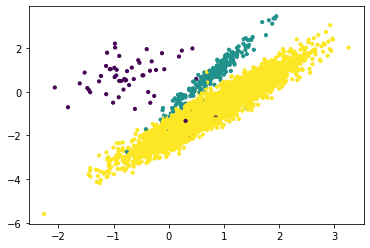

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [13]:
X_resampled,y_resampled = SMOTE().fit_resample(X,y)

In [14]:
X_resampled.shape,y_resampled.shape

((14022, 2), (14022,))

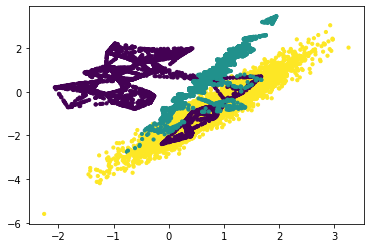

In [15]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [16]:
X_resampled,y_resampled = SMOTEENN().fit_resample(X,y)

In [17]:
X_resampled.shape,y_resampled.shape

((11799, 2), (11799,))

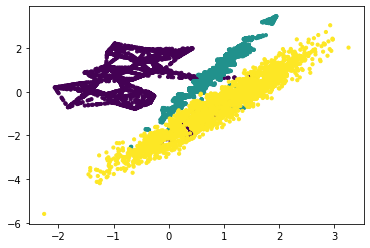

In [18]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

# Choosing Estimator
* SGDClassifier
* Randam Forest Classifier
* Support Vector Classifier

In [21]:
from imblearn.pipeline import make_pipeline

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [29]:
models =[SGDClassifier(),RandomForestClassifier(),SVC() ]
samplers = [SMOTE(),SMOTEENN() ]

In [30]:
model_pipelines =[]
for model in models:
    for sampler in sample:
        pipeline = make_pipeline(StandardScaler(),sampler,model )
        model_pipelines.append(pipeline)

In [31]:
model_pipelines

[Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('sgdclassifier', SGDClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('sgdclassifier', SGDClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('svc', SVC())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('smoteenn', SMOTEENN()),
                 ('svc', SVC())])]

In [37]:
X = credit.drop(['Class','Time'],axis=1)
y= credit.Class

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [42]:
for pipeline in model_pipelines:
    pipeline.fit(x_train,y_train)

In [43]:
for pipeline in model_pipelines:
    print(pipeline.score(x_test,y_test))

0.98344
0.98344
0.99912
0.99912
0.99416
0.99416
